In [1]:
import pandas as pd
import numpy as np
import random
from dataprep.eda import plot

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

NumExpr defaulting to 4 threads.


In [2]:
#Reading the dataset into pandas
data=pd.read_excel("Take Home Dataset.xlsx")

In [3]:
#size of the dataset
data.shape

(282, 6)

In [4]:
# printing the concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 6 columns):
extractorName               282 non-null object
input_runTime(min)          280 non-null float64
input_netCannabinoids(%)    279 non-null float64
output_cannabinoids(%)      277 non-null float64
pressure(bar)               279 non-null float64
temperature(C)              279 non-null float64
dtypes: float64(5), object(1)
memory usage: 13.3+ KB


In [5]:
#printing the missing values in the columns

def missing_value_percent(data, column_name):
    row_count = data[column_name].shape[0]
    empty_values = row_count - data[column_name].count()
    return (100.0*empty_values)/row_count
for i in list(data):
    print(i +': ' + str(missing_value_percent(data,i))+'%') 

extractorName: 0.0%
input_runTime(min): 0.7092198581560284%
input_netCannabinoids(%): 1.0638297872340425%
output_cannabinoids(%): 1.7730496453900708%
pressure(bar): 1.0638297872340425%
temperature(C): 1.0638297872340425%


In [6]:
# Replacing the empty spaces if present with Null types
data = data.replace(r'^\s*$', np.nan, regex=True)

In [7]:
#finding all the null values in the feature columns
data.isnull().sum()

extractorName               0
input_runTime(min)          2
input_netCannabinoids(%)    3
output_cannabinoids(%)      5
pressure(bar)               3
temperature(C)              3
dtype: int64

In [8]:
data

,extractorName,input_runTime(min),input_netCannabinoids(%),output_cannabinoids(%),pressure(bar),temperature(C)
0,Extrakt A,100.0,17.7200,52.866274,345.264957,75.542857
1,Extrakt A,151.0,17.7200,78.422278,346.806428,81.550000
2,Extrakt A,99.0,16.1580,64.067291,347.742145,75.214286
3,Extrakt A,96.0,17.7200,52.545082,345.821462,60.142857
4,Extrakt A,93.0,15.3400,67.794228,346.264697,72.600000
...,...,...,...,...,...,...
277,EXT-100,80.0,9.8424,68.293121,350.000000,55.000000
278,EXT-100,70.0,11.6520,64.759811,350.000000,55.000000
279,EXT-100,70.0,9.8424,55.082794,350.000000,55.000000
280,EXT-100,70.0,12.1010,70.873186,350.000000,55.000000


In [9]:
data.describe()

,input_runTime(min),input_netCannabinoids(%),output_cannabinoids(%),pressure(bar),temperature(C)
count,280.000000,279.000000,277.000000,279.000000,279.000000
mean,126.628571,13.645493,62.967924,321.442332,56.818547
std,172.805725,3.114022,11.986393,70.804941,6.979079
min,70.000000,7.398000,4.141176,86.460290,33.777780
25%,70.000000,11.652000,57.931007,346.855676,55.000000
50%,75.000000,12.958000,66.519506,350.000000,55.000000
75%,80.000000,16.759000,70.272448,350.000000,55.000000
max,1320.000000,18.411000,88.966677,350.000000,81.550000


The above table shows the descriptive statistics of the dataset provided. However the distribution and dispersion of data is not clear from the table. Hence the exploratory data analysis(EDA) to get the insights from the data.

In [10]:
#Exploratory Data Analysis using Dataprep
plot(data);

<b> Following is the EDA for individual extractor name 

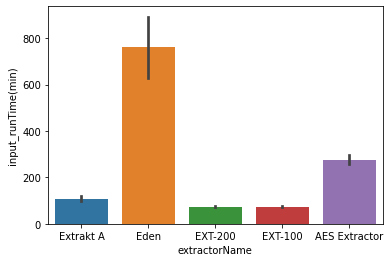

In [11]:
sns.barplot(x='extractorName', y= 'input_runTime(min)', data = data)

From the above plot we see that the input run time is maximum for Eden extractor.

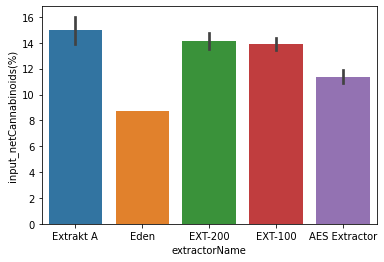

In [12]:
sns.barplot(x='extractorName', y='input_netCannabinoids(%)', data=data)

From the above plot we see that the input for Eden is less in comparison to other extractor names.

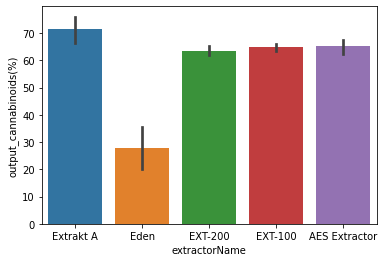

In [13]:
sns.barplot(x='extractorName', y='output_cannabinoids(%)', data=data)

From the above plot we see that the cannabinoids output for Eden is less than the other extractor names. Still makes sense because the cannabinoids input provided (as in the dataset) is less as seen from the previous plot. Still than, for the less input given, the run time required by Eden is higher.

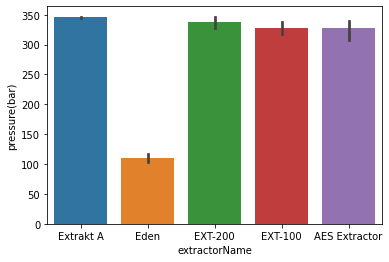

In [14]:
sns.barplot(x='extractorName', y='pressure(bar)', data=data)

Except Eden all other extractor require higher pressure. 

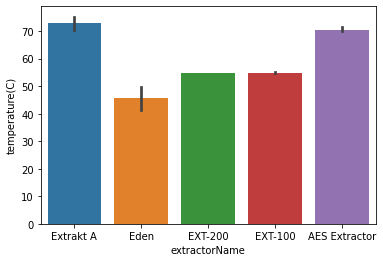

In [15]:
sns.barplot(x='extractorName', y='temperature(C)', data=data)

Extrakt A and AES Extractor have a higher temperature data in comparison to other as provided in the dataset. EXT-200 and EXT-100 have almost similiar temp data.

<b> Following is the EDA with respect to the cannabinoids output 


Drawing Scatterplot to show the relationship between the dependent feature 'cannabinoids output' and other independent feature columns

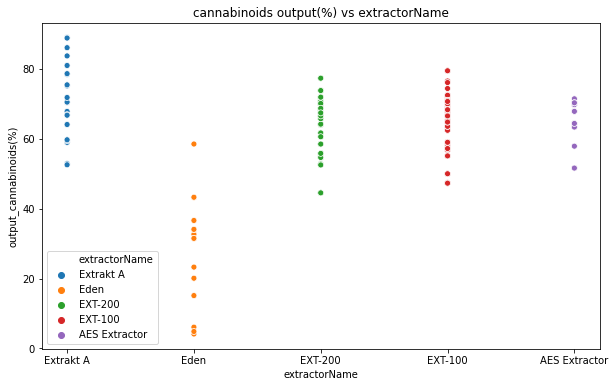

In [16]:
plt.figure(figsize=(10,6))
plt.title("cannabinoids output(%) vs extractorName")
sns.scatterplot(x='extractorName', y='output_cannabinoids(%)',hue ='extractorName', data=data)
plt.show();

So from the above plot, we see that from the dataset given, different extractors have different range of cannabinoids output with the Eden having the least Cannabinoids output.

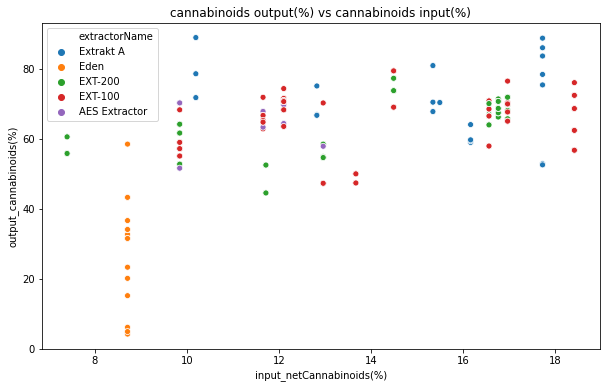

In [17]:
plt.figure(figsize=(10,6))
plt.title("cannabinoids output(%) vs cannabinoids input(%)")
sns.scatterplot(x='input_netCannabinoids(%)', y='output_cannabinoids(%)',hue ='extractorName', data=data)
plt.show();

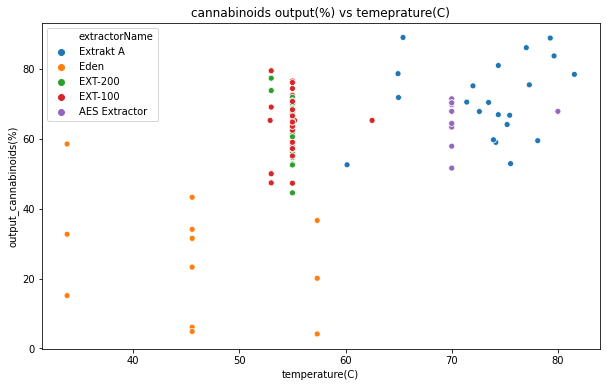

In [18]:
plt.figure(figsize=(10,6))
plt.title("cannabinoids output(%) vs temeprature(C)")
sns.scatterplot(x='temperature(C)', y='output_cannabinoids(%)', hue = 'extractorName', data=data)
plt.show();

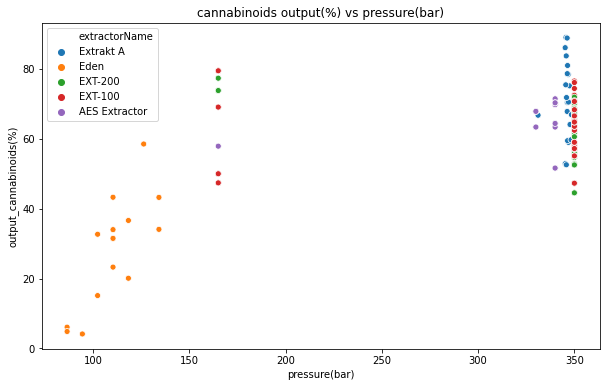

In [19]:
plt.figure(figsize=(10,6))
plt.title("cannabinoids output(%) vs pressure(bar)")
sns.scatterplot(x='pressure(bar)', y='output_cannabinoids(%)', hue ='extractorName', data=data)
plt.show();

From the above scatterplot, we find that there is no datapoints for the pressure between 200 bar to 300 bar.

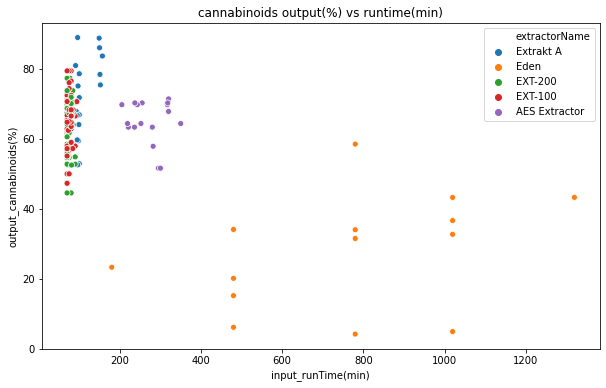

In [20]:
plt.figure(figsize=(10,6))
plt.title("cannabinoids output(%) vs runtime(min)")
sns.scatterplot(x='input_runTime(min)', y='output_cannabinoids(%)', hue = 'extractorName', data=data);

From the above scatterplots, we see that there is no definite correlation or relationship visible between the feature variables and the output. 

<b> Checking for the outliers if any

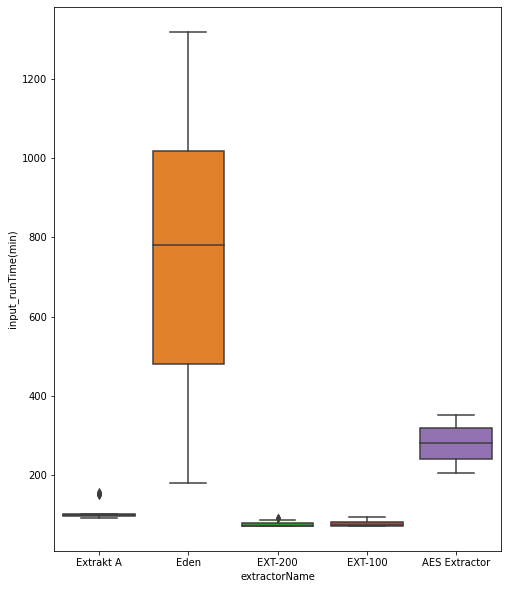

In [21]:
#For run time

plt.figure(figsize=(8,10))
ax = sns.boxplot(x="extractorName", y="input_runTime(min)", data=data)

There are few outliers in input_runTime for Extrakt A and EXT-200 as seen from the boxplot above. Also suggest that the data for runtime are close together, except for Eden and AES Extractor.

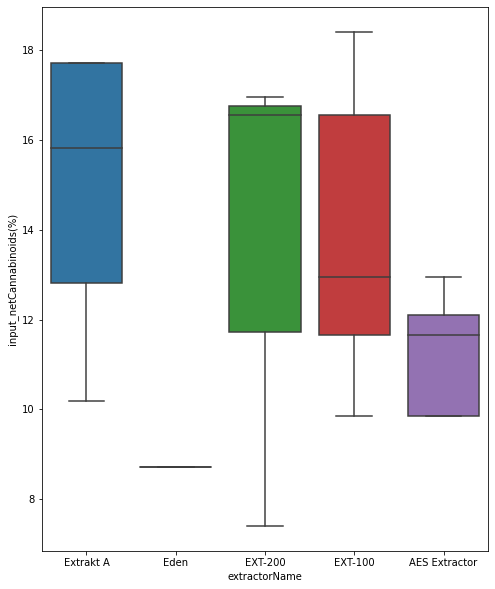

In [22]:
#For cannabinoids input(%)

plt.figure(figsize=(8,10))
ax = sns.boxplot(x="extractorName", y="input_netCannabinoids(%)", data=data)

There are no outliers, However boxplot for Eden shows the values are same for the feature- cannabinoids input(%)

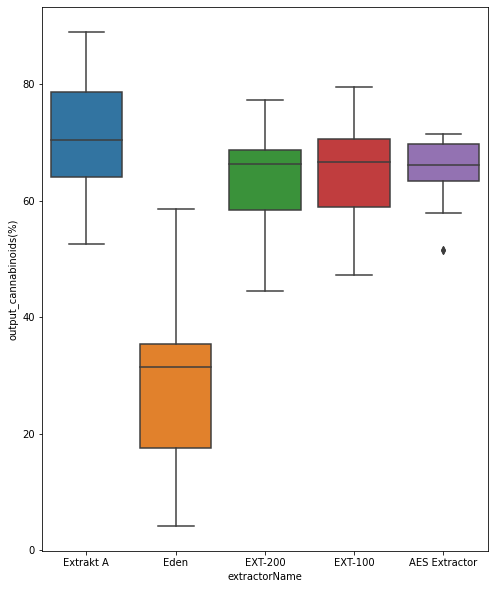

In [23]:
#For cannabinoids output(%)

plt.figure(figsize=(8,10))
ax = sns.boxplot(x="extractorName", y="output_cannabinoids(%)", data=data)

There is one outlier for cannabinoids output in AES extractor 

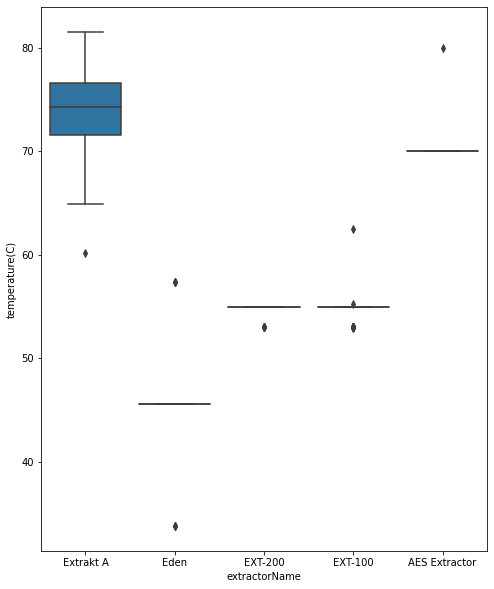

In [24]:
#For temperature(C)

plt.figure(figsize=(8,10))
ax = sns.boxplot(x="extractorName", y="temperature(C)", data=data)

Above Boxplot shows there exists outliers for all the extractor names. Boxplots for all except 'Extrakt A' suggest that the temperature data are condensed or are close together.

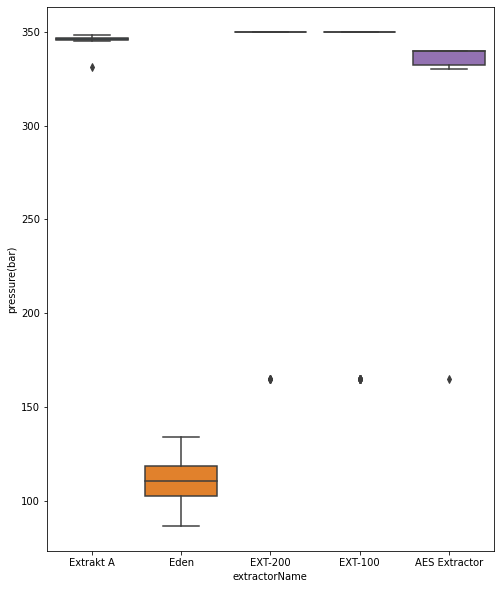

In [25]:
#For pressure(bar)

plt.figure(figsize=(8,10))
ax = sns.boxplot(x="extractorName", y="pressure(bar)", data=data)

Above Boxplot shows that the data given for pressure feature has few outliers. Also for some extractor names like 'Extrakt A', EXT-200, EXT-100 the data points for pressure lie close together or condensed.

<b> Following is the visualization for the distribution of dataset 

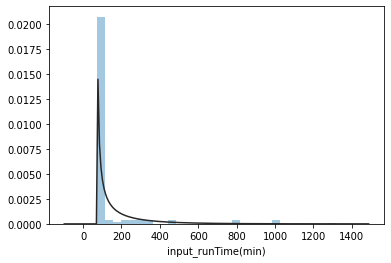

In [26]:
#for runtime
sns.distplot(data['input_runTime(min)'].dropna(), bins=30, kde=False, fit=stats.gamma);

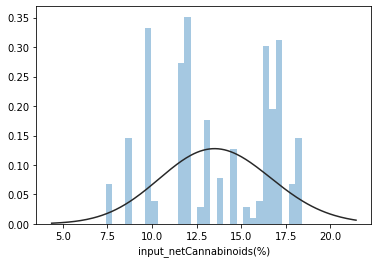

In [27]:
#for cannabinoids input(%)
sns.distplot(data['input_netCannabinoids(%)'].dropna(), bins=30, kde=False, fit=stats.gamma);

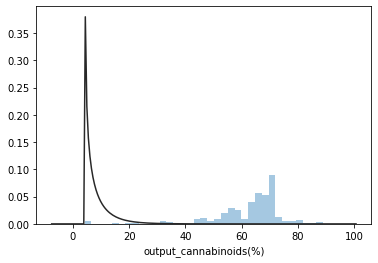

In [28]:
#for cannabinoids output(%)
sns.distplot(data['output_cannabinoids(%)'].dropna(), bins=35, kde=False, fit=stats.gamma);

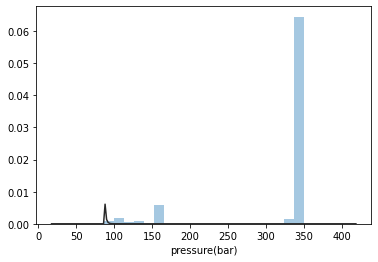

In [29]:
#for pressure(bar)
sns.distplot(data['pressure(bar)'].dropna(), bins=20, kde=False, fit=stats.gamma);

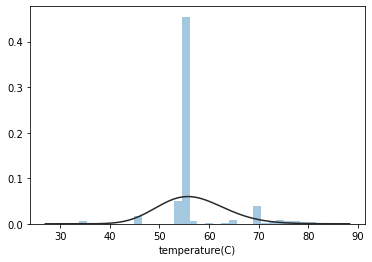

In [30]:
#for temperature(C)
sns.distplot(data['temperature(C)'].dropna(), bins=30, kde=False, fit=stats.gamma);

From the above plotted Histograms, it is clear that the data in the feature column is not normally distributed. For 'cannabinoids output' it is skewed left and for 'runtime', the data points are right skewed.


<b> Handling the missing data in the dataset

In [31]:
#description of dataset by grouping with respect to 'extractorName'
data.groupby('extractorName').describe().T

extractorName                   AES Extractor     EXT-100     EXT-200  \
input_runTime(min)       count      18.000000  130.000000   95.000000   
                         mean      276.111111   74.330769   74.021053   
                         std        43.561841    5.134453    4.987173   
                         min       205.000000   70.000000   70.000000   
                         25%       238.500000   70.000000   70.000000   
                         50%       281.000000   72.000000   70.000000   
                         75%       317.750000   80.000000   77.000000   
                         max       350.000000   94.000000   90.000000   
input_netCannabinoids(%) count      17.000000  131.000000   94.000000   
                         mean       11.381471   13.902922   14.172987   
                         std         1.067882    2.834423    3.183595   
                         min         9.842400    9.842400    7.398000   
                         25%         9.842400   11.652000   11.714000   
                         50%        11.652000   12.958000   16.557000   
                         75%        12.101000   16.557000   16.759000   
                         max        12.958000   18.411000   16.961000   
output_cannabinoids(%)   count      18.000000  130.000000   93.000000   
                         mean       65.077053   64.916088   63.603867   
                         std         6.076788    7.551672    7.593653   
                         min        51.603718   47.278273   44.514300   
                         25%        63.340741   58.985108   58.473043   
                         50%        66.099289   66.694235   66.242366   
                         75%        69.761393   70.640525   68.697804   
                         max        71.420657   79.437907   77.317677   
pressure(bar)            count      18.000000  129.000000   95.000000   
                         mean      328.055556  328.488372  338.315789   
                         std        40.913786   59.534669   45.239378   
                         min       165.000000  165.000000  165.000000   
                         25%       332.500000  350.000000  350.000000   
                         50%       340.000000  350.000000  350.000000   
                         75%       340.000000  350.000000  350.000000   
                         max       340.000000  350.000000  350.000000   
temperature(C)           count      18.000000  129.000000   96.000000   
                         mean       70.555556   54.810853   54.875000   
                         std         2.357023    0.952320    0.486664   
                         min        70.000000   52.900000   53.000000   
                         25%        70.000000   55.000000   55.000000   
                         50%        70.000000   55.000000   55.000000   
                         75%        70.000000   55.000000   55.000000   
                         max        80.000000   62.500000   55.000000   

extractorName                           Eden   Extrakt A  
input_runTime(min)       count  1.500000e+01   22.000000  
                         mean   7.600000e+02  108.681818  
                         std    2.971291e+02   24.188518  
                         min    1.800000e+02   90.000000  
                         25%    4.800000e+02   95.000000  
                         50%    7.800000e+02   98.500000  
                         75%    1.020000e+03  100.000000  
                         max    1.320000e+03  157.000000  
input_netCannabinoids(%) count  1.500000e+01   22.000000  
                         mean   8.710000e+00   14.973364  
                         std    3.677408e-15    2.798045  
                         min    8.710000e+00   10.193000  
                         25%    8.710000e+00   12.820000  
                         50%    8.710000e+00   15.824000  
                         75%    8.710000e+00   17.720000  
                         max    8.710000e+00   17.720000  
out

From the summary statistics shown above, when the dataset is grouped by 'extractorName' we find that different extractor name have different dispersion, distribution shape of data for the respective feature columns. Hence replacing the missing values with the feature columns mean/median won't do good and won't be meaningful.

Also deletion of rows won't be a good criteria since the dataset is small and deletion of rows which are  having missing values will lead to loss of information. 

It would be better if we can group the data on the basis of the extractor names and then replace the missing values. It would make sense instead of replacing the data with the mean or median of the entire feature column which can lead to inaccurate learning for the model. 

In [32]:
df_A = data[data['extractorName']=='Extrakt A']
df_eden = data[data['extractorName']=='Eden']
df_ext_200 = data[data['extractorName']=='EXT-200']
df_ext_100 = data[data['extractorName']=='EXT-100']
df_AES = data[data['extractorName']=='AES Extractor']

In [33]:
df_A.isnull().sum()

extractorName               0
input_runTime(min)          0
input_netCannabinoids(%)    0
output_cannabinoids(%)      1
pressure(bar)               0
temperature(C)              0
dtype: int64

In [34]:
df_A.describe()

,input_runTime(min),input_netCannabinoids(%),output_cannabinoids(%),pressure(bar),temperature(C)
count,22.000000,22.000000,21.000000,22.000000,22.000000
mean,108.681818,14.973364,71.316544,345.803106,72.999835
std,24.188518,2.798045,11.054742,3.393369,5.605093
min,90.000000,10.193000,52.545082,331.135624,60.142857
25%,95.000000,12.820000,64.067291,345.784526,71.560714
50%,98.500000,15.824000,70.484702,346.313945,74.271429
75%,100.000000,17.720000,78.613291,346.880300,76.650714
max,157.000000,17.720000,88.966677,348.461170,81.550000


In [35]:
df_eden.isnull().sum()

extractorName               0
input_runTime(min)          0
input_netCannabinoids(%)    0
output_cannabinoids(%)      0
pressure(bar)               0
temperature(C)              1
dtype: int64

In [36]:
df_eden.describe()

,input_runTime(min),input_netCannabinoids(%),output_cannabinoids(%),pressure(bar),temperature(C)
count,15.000000,1.500000e+01,15.000000,15.000000,14.000000
mean,760.000000,8.710000e+00,27.921964,110.316144,45.555581
std,297.129121,3.677408e-15,15.634957,14.734820,8.001424
min,180.000000,8.710000e+00,4.141176,86.460290,33.777780
25%,480.000000,8.710000e+00,17.607937,102.318238,45.555600
50%,780.000000,8.710000e+00,31.489437,110.316100,45.555600
75%,1020.000000,8.710000e+00,35.342502,118.314082,45.555600
max,1320.000000,8.710000e+00,58.485981,134.172030,57.333333


In [37]:
df_ext_200.isnull().sum()

extractorName               0
input_runTime(min)          1
input_netCannabinoids(%)    2
output_cannabinoids(%)      3
pressure(bar)               1
temperature(C)              0
dtype: int64

In [38]:
df_ext_200

,extractorName,input_runTime(min),input_netCannabinoids(%),output_cannabinoids(%),pressure(bar),temperature(C)
37,EXT-200,70.0,16.759,67.448386,350.0,55.0
39,EXT-200,80.0,16.557,66.997125,350.0,55.0
41,EXT-200,77.0,16.557,63.983610,350.0,55.0
45,EXT-200,70.0,7.398,NaN,350.0,55.0
46,EXT-200,75.0,16.961,69.759079,350.0,55.0
...,...,...,...,...,...,...
255,EXT-200,80.0,16.557,66.533581,350.0,55.0
261,EXT-200,75.0,NaN,67.393028,350.0,55.0
262,EXT-200,70.0,14.487,73.781303,165.0,53.0
265,EXT-200,70.0,11.714,44.514300,350.0,55.0


In [39]:
df_ext_200.describe()

,input_runTime(min),input_netCannabinoids(%),output_cannabinoids(%),pressure(bar),temperature(C)
count,95.000000,94.000000,93.000000,95.000000,96.000000
mean,74.021053,14.172987,63.603867,338.315789,54.875000
std,4.987173,3.183595,7.593653,45.239378,0.486664
min,70.000000,7.398000,44.514300,165.000000,53.000000
25%,70.000000,11.714000,58.473043,350.000000,55.000000
50%,70.000000,16.557000,66.242366,350.000000,55.000000
75%,77.000000,16.759000,68.697804,350.000000,55.000000
max,90.000000,16.961000,77.317677,350.000000,55.000000


In [40]:
df_ext_100.isnull().sum()

extractorName               0
input_runTime(min)          1
input_netCannabinoids(%)    0
output_cannabinoids(%)      1
pressure(bar)               2
temperature(C)              2
dtype: int64

In [41]:
df_ext_100

,extractorName,input_runTime(min),input_netCannabinoids(%),output_cannabinoids(%),pressure(bar),temperature(C)
38,EXT-100,70.0,11.6520,65.239567,350.0,55.0
42,EXT-100,80.0,9.8424,58.985108,350.0,55.0
43,EXT-100,70.0,12.1010,70.655477,350.0,NaN
44,EXT-100,70.0,13.6670,49.980749,165.0,53.0
49,EXT-100,70.0,16.5570,70.850940,350.0,55.0
...,...,...,...,...,...,...
277,EXT-100,80.0,9.8424,68.293121,350.0,55.0
278,EXT-100,70.0,11.6520,64.759811,350.0,55.0
279,EXT-100,70.0,9.8424,55.082794,350.0,55.0
280,EXT-100,70.0,12.1010,70.873186,350.0,55.0


In [42]:
df_ext_100.describe()

,input_runTime(min),input_netCannabinoids(%),output_cannabinoids(%),pressure(bar),temperature(C)
count,130.000000,131.000000,130.000000,129.000000,129.000000
mean,74.330769,13.902922,64.916088,328.488372,54.810853
std,5.134453,2.834423,7.551672,59.534669,0.952320
min,70.000000,9.842400,47.278273,165.000000,52.900000
25%,70.000000,11.652000,58.985108,350.000000,55.000000
50%,72.000000,12.958000,66.694235,350.000000,55.000000
75%,80.000000,16.557000,70.640525,350.000000,55.000000
max,94.000000,18.411000,79.437907,350.000000,62.500000


In [43]:
df_AES.isnull().sum()

extractorName               0
input_runTime(min)          0
input_netCannabinoids(%)    1
output_cannabinoids(%)      0
pressure(bar)               0
temperature(C)              0
dtype: int64

In [44]:
df_AES

,extractorName,input_runTime(min),input_netCannabinoids(%),output_cannabinoids(%),pressure(bar),temperature(C)
40,AES Extractor,280.0,NaN,63.340741,330.0,70.0
48,AES Extractor,221.0,11.6520,63.340741,330.0,70.0
53,AES Extractor,255.0,9.8424,70.272448,340.0,70.0
54,AES Extractor,320.0,11.6520,67.828425,330.0,80.0
65,AES Extractor,295.0,9.8424,51.603718,340.0,70.0
75,AES Extractor,252.0,12.1010,64.370153,340.0,70.0
92,AES Extractor,317.0,12.1010,69.761393,340.0,70.0
93,AES Extractor,320.0,11.6520,67.828425,330.0,70.0
111,AES Extractor,243.0,12.1010,69.761393,340.0,70.0
142,AES Extractor,320.0,12.1010,71.420657,340.0,70.0


In [45]:
df_AES.describe()

,input_runTime(min),input_netCannabinoids(%),output_cannabinoids(%),pressure(bar),temperature(C)
count,18.000000,17.000000,18.000000,18.000000,18.000000
mean,276.111111,11.381471,65.077053,328.055556,70.555556
std,43.561841,1.067882,6.076788,40.913786,2.357023
min,205.000000,9.842400,51.603718,165.000000,70.000000
25%,238.500000,9.842400,63.340741,332.500000,70.000000
50%,281.000000,11.652000,66.099289,340.000000,70.000000
75%,317.750000,12.101000,69.761393,340.000000,70.000000
max,350.000000,12.958000,71.420657,340.000000,80.000000


Since the dataset is small, We can easily check for individual dataframe grouped by extractor names and check in which column the missing value is. I checked for the missing value in the feature column and checked for the descriptive statistics of the individual dataframe. It is safe to replace the missing values in individual dataframe created above, by their respecctive mean. If we look closely we find that for many rows, the values in the feature columns are repeated, hence we can get the idea if the mean would fit correctly for the missing values or not.  

We could have also used the K nearest neighbours (which uses the feature similarity to predict the value of a new datapoint) to impute the missing data but given the size of the dataset and knn being computationally expensive, I dropped the idea.

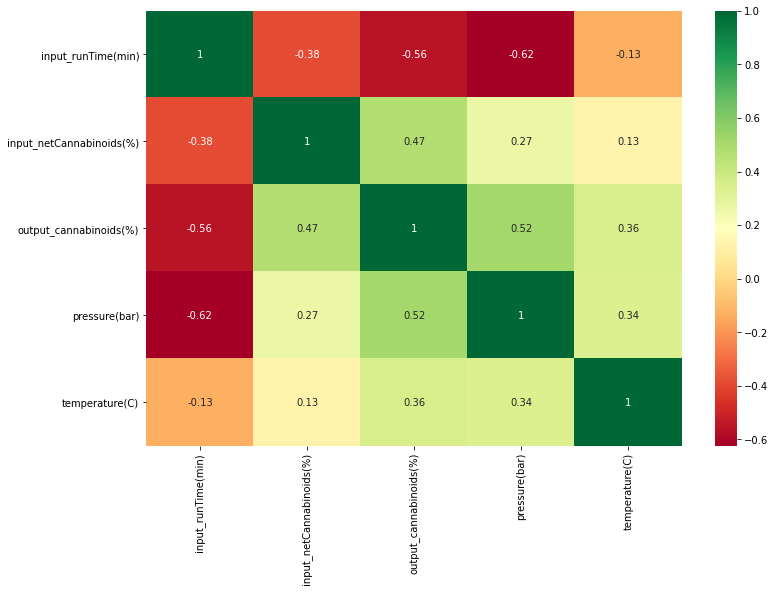

In [46]:
corr_matrix = data.corr()
corr_features = corr_matrix.index
plt.figure(figsize=(12,8))
#plot heat map
sns.heatmap(data[corr_features].corr(),annot=True,cmap="RdYlGn");

Also, I plotted the correlation matrix to find the correlation between the feature columns. Few features are correlated, but given the data size and size of the missing values, replacement of missing values with the mean made more sense instead of going for stocahstic regression imputation.

In [47]:
#Replacing the missing values with mean
df_A.fillna(value=df_A.mean(), inplace=True)
df_eden.fillna(value=df_eden.mean(), inplace = True)
df_ext_200.fillna(value=df_ext_200.mean(), inplace= True)
df_ext_100.fillna(value=df_ext_100.mean(), inplace = True)
df_AES.fillna(value=df_AES.mean(), inplace = True)

/home/chidu/files/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [48]:
#Now joining all the dataframe into one 
data_fin = pd.concat([df_A,df_eden, df_ext_200,df_ext_100,df_AES], axis =0)

In [49]:
data_fin

,extractorName,input_runTime(min),input_netCannabinoids(%),output_cannabinoids(%),pressure(bar),temperature(C)
0,Extrakt A,100.0,17.7200,52.866274,345.264957,75.542857
1,Extrakt A,151.0,17.7200,78.422278,346.806428,81.550000
2,Extrakt A,99.0,16.1580,64.067291,347.742145,75.214286
3,Extrakt A,96.0,17.7200,52.545082,345.821462,60.142857
4,Extrakt A,93.0,15.3400,67.794228,346.264697,72.600000
...,...,...,...,...,...,...
222,AES Extractor,236.0,11.6520,63.340741,340.000000,70.000000
235,AES Extractor,237.0,9.8424,70.272448,340.000000,70.000000
239,AES Extractor,282.0,12.9580,57.867811,165.000000,70.000000
245,AES Extractor,219.0,12.1010,64.370153,340.000000,70.000000


In [50]:
data_fin.isnull().sum()

extractorName               0
input_runTime(min)          0
input_netCannabinoids(%)    0
output_cannabinoids(%)      0
pressure(bar)               0
temperature(C)              0
dtype: int64

Since the individual dataframes are added row-wise, I am Reindexing or changing the order of the rows so that there is proper shuffling of the extractor names. 

In [51]:
data_fin.reset_index(drop=True,inplace=True)

In [52]:
data_fin

,extractorName,input_runTime(min),input_netCannabinoids(%),output_cannabinoids(%),pressure(bar),temperature(C)
0,Extrakt A,100.0,17.7200,52.866274,345.264957,75.542857
1,Extrakt A,151.0,17.7200,78.422278,346.806428,81.550000
2,Extrakt A,99.0,16.1580,64.067291,347.742145,75.214286
3,Extrakt A,96.0,17.7200,52.545082,345.821462,60.142857
4,Extrakt A,93.0,15.3400,67.794228,346.264697,72.600000
...,...,...,...,...,...,...
277,AES Extractor,236.0,11.6520,63.340741,340.000000,70.000000
278,AES Extractor,237.0,9.8424,70.272448,340.000000,70.000000
279,AES Extractor,282.0,12.9580,57.867811,165.000000,70.000000
280,AES Extractor,219.0,12.1010,64.370153,340.000000,70.000000


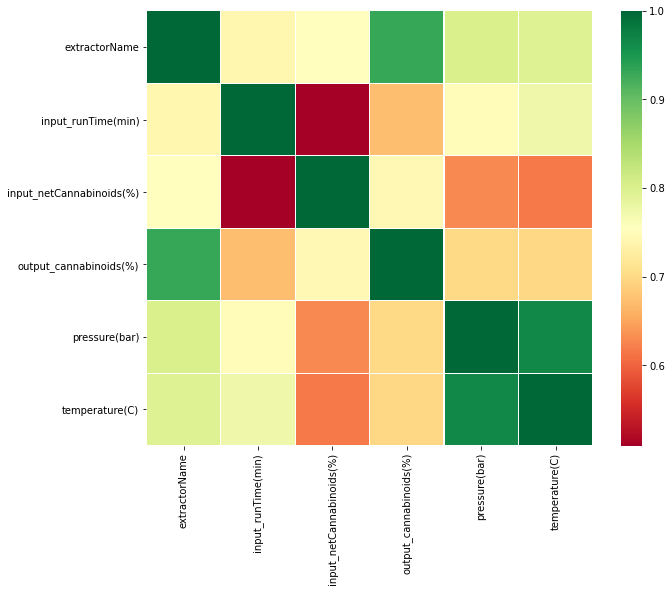

In [53]:
#Correlation matrix for all the features
plt.figure(figsize=(10,8))
corr_mat = data_fin.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, linewidths=.2, cmap='RdYlGn')

From the above correlation_matrix we can see that there is positive strong correlation between pressure and temperature. extractor name has high strong correlation with the cannabinoids output. 

<b> Feature Selection

In [54]:
#converting the categorical column into one-hot encoding
category_list = ['extractorName']
cat_onehotenc = pd.get_dummies(data_fin[category_list])

In [55]:
cat_onehotenc

,extractorName_AES Extractor,extractorName_EXT-100,extractorName_EXT-200,extractorName_Eden,extractorName_Extrakt A
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
277,1,0,0,0,0
278,1,0,0,0,0
279,1,0,0,0,0
280,1,0,0,0,0


Majority of Machine Learning algorithms work well when dealing with features on a same scale.From the above boxplots we have seen the presence of outliers in our dataset. Also from histogram plots above, it is evident that the data is not symmetric and is skewed. That is why I implemented the normalization of data. By doing this, the range of the data becomes less when scaled in a particular range. This makes it easier for the learning algorithms to learn the weight of the parameters. Also it keeps the useful information about the outliers and makes the algorithm less sensitive to them. Outliers become much more problem for a small dataset and hence I used the normalization method to avoid it.

In [56]:
from sklearn.preprocessing import MinMaxScaler
num_list = ['input_runTime(min)','input_netCannabinoids(%)','output_cannabinoids(%)','pressure(bar)','temperature(C)']
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(data=scaler.fit_transform(data_fin[num_list]), columns=num_list)

In [57]:
data_scaled

,input_runTime(min),input_netCannabinoids(%),output_cannabinoids(%),pressure(bar),temperature(C)
0,0.0240,0.937256,0.574416,0.982033,0.874254
1,0.0648,0.937256,0.875693,0.987882,1.000000
2,0.0232,0.795424,0.706463,0.991433,0.867377
3,0.0208,0.937256,0.570629,0.984145,0.551891
4,0.0184,0.721148,0.750400,0.985826,0.812653
...,...,...,...,...,...
277,0.1328,0.386271,0.697898,0.962055,0.758228
278,0.1336,0.221956,0.779615,0.962055,0.758228
279,0.1696,0.504858,0.633378,0.298019,0.758228
280,0.1192,0.427041,0.710034,0.962055,0.758228


In [58]:
#Joining the one hot encoded and scaled dataset
df_join = pd.concat([cat_onehotenc,data_scaled], axis=1)

In [59]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 10 columns):
extractorName_AES Extractor    282 non-null uint8
extractorName_EXT-100          282 non-null uint8
extractorName_EXT-200          282 non-null uint8
extractorName_Eden             282 non-null uint8
extractorName_Extrakt A        282 non-null uint8
input_runTime(min)             282 non-null float64
input_netCannabinoids(%)       282 non-null float64
output_cannabinoids(%)         282 non-null float64
pressure(bar)                  282 non-null float64
temperature(C)                 282 non-null float64
dtypes: float64(5), uint8(5)
memory usage: 12.5 KB


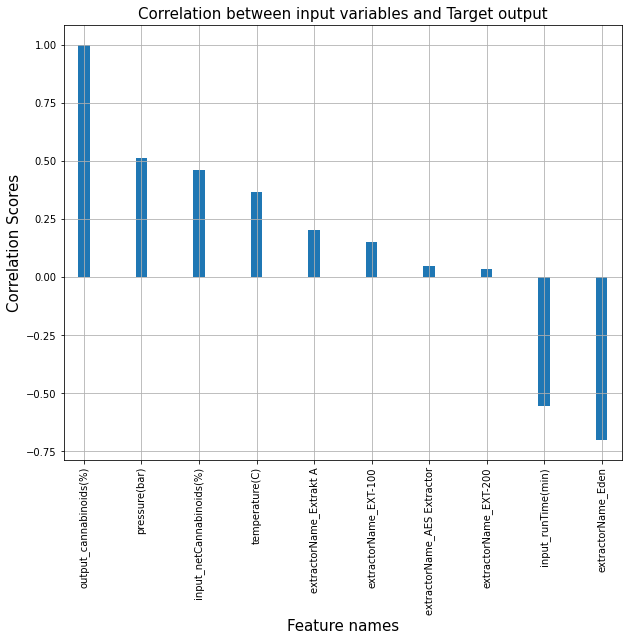

In [60]:
plt.figure(figsize=(10,8))
ax = df_join.corr()['output_cannabinoids(%)'].sort_values(ascending = False)
ax.plot(kind='bar', width=0.2)
plt.title('Correlation between input variables and Target output', fontsize=15)
plt.xlabel("Feature names", fontsize=15)
plt.ylabel("Correlation Scores", fontsize=15) 
plt.grid()
plt.xticks(rotation=90);

In [61]:
X = df_join.drop(columns='output_cannabinoids(%)')
y = df_join['output_cannabinoids(%)']


In [62]:
#Using the Univariate linear regression tests 
from sklearn.feature_selection import f_regression
fval, pval =f_regression(X,y,center=True)

In [63]:
df_fscore = pd.DataFrame(fval)
df_pval = pd.DataFrame(pval)
df_columns = pd.DataFrame(X.columns)
featureScores = pd.concat([df_columns,df_fscore,df_pval],axis=1)
featureScores.columns = ['features','F-score','p-value'] 

In [64]:
featureScores.sort_values(by ='p-value', ascending=False)

,features,F-score,p-value
2,extractorName_EXT-200,0.360782,5.485581e-01
0,extractorName_AES Extractor,0.579527,4.471384e-01
1,extractorName_EXT-100,6.399642,1.196306e-02
4,extractorName_Extrakt A,12.101796,5.839339e-04
8,temperature(C),42.702107,3.002263e-10
6,input_netCannabinoids(%),75.890134,2.666377e-16
7,pressure(bar),100.536077,2.039523e-20
5,input_runTime(min),125.373125,2.703057e-24
3,extractorName_Eden,270.095416,5.910882e-43


if we consider the significance level (alpha) to be 0.05, we find that maximum of the features have a p-value less than 0.05. Which means we can reject the null Hypothesis which states the feature is not statistically significant. Only for AES Extractor, and EXT-200 the p-value is higher than 0.05. But since the pvalue for other extractor names is below the significant level, this indicates that the extractor names are significant to the model and thus cant be omitted.  

In [65]:
# Using Recursive Feature Elimination method for finding the best combination of features
from sklearn import svm
from sklearn.feature_selection import RFE
estimator = svm.SVR(kernel="linear")
# using the n_features_to_select as 6
rfe = RFE(estimator,n_features_to_select =6, step=1)
rfe_fit=rfe.fit(X,y)

In [66]:
rfe_fit

RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                  gamma='scale', kernel='linear', max_iter=-1, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=6, step=1, verbose=0)

In [67]:
# No of features selected by Recursive Feature Elimination(RFE)
print(rfe_fit.n_features_)

6


In [68]:
df1_features = pd.DataFrame(rfe_fit.support_)
df1_columns = pd.DataFrame(X.columns)
df1_ranks = pd.DataFrame(rfe_fit.ranking_)
featureScores_rfe = pd.concat([df1_columns,df1_features,df1_ranks],axis=1)
featureScores_rfe.columns = ['features','Support', 'Ranking'] 

In [69]:
featureScores_rfe

,features,Support,Ranking
0,extractorName_AES Extractor,False,2
1,extractorName_EXT-100,True,1
2,extractorName_EXT-200,True,1
3,extractorName_Eden,True,1
4,extractorName_Extrakt A,True,1
5,input_runTime(min),True,1
6,input_netCannabinoids(%),True,1
7,pressure(bar),False,3
8,temperature(C),False,4


In RFE, first the estimator(in this case SVR) is trained on the initial set of features and the importance of each feature is obtained.It works by recursively removing features and building a model on those features that remain. It uses the model accuracy to identify which features or the combination of features, contribute the most to predicting the target. 


Choosing 6 as the features to select, we see the RFE method shows that the features 'pressure' and 'temperature' is not so significant for predicting the cannabinoids output. Or may be the one-hot-encoded categorical features dominate over these two features, making the significance less. RFE basically chooses the combination of features which fit best for the model. In this case I have used the estimator as SVR.   

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=6)
rfe_lr = rfe.fit(X,y)

In [71]:
rfe_lr.n_features_

6

In [72]:
df2_features = pd.DataFrame(rfe_lr.support_)
df2_columns = pd.DataFrame(X.columns)
df2_ranks = pd.DataFrame(rfe_lr.ranking_)
featureScores_rfe_lr = pd.concat([df2_columns,df2_features,df2_ranks],axis=1)
featureScores_rfe_lr.columns = ['features','Support', 'Ranking'] 

In [73]:
featureScores_rfe_lr

,features,Support,Ranking
0,extractorName_AES Extractor,True,1
1,extractorName_EXT-100,False,2
2,extractorName_EXT-200,False,3
3,extractorName_Eden,True,1
4,extractorName_Extrakt A,True,1
5,input_runTime(min),True,1
6,input_netCannabinoids(%),True,1
7,pressure(bar),False,4
8,temperature(C),True,1


If we consider Liner regression as the estimator, features obtained are different as compared to SVR. However both the estimators show that the pressure and temperature are not significant when used in a combination of features for predicting the output. However if we test the correlation and F-test we find that the pressure and temperature have a significance. F-score/ p-value is testing the individual effect of the regressors for the target output. RFE considers the significance of the combination of features when used in combination. 

So I thought of checking wether the extractor name play a significant role or is pressure and temperature do not play a significant role while used in combination of features. So i tested the RFE method once again, This time removing the extractorName feature from the dataset

In [74]:
k=data['extractorName']

In [75]:
df_norm = pd.concat([k,data_scaled], axis =1)

In [76]:
df_norm

,extractorName,input_runTime(min),input_netCannabinoids(%),output_cannabinoids(%),pressure(bar),temperature(C)
0,Extrakt A,0.0240,0.937256,0.574416,0.982033,0.874254
1,Extrakt A,0.0648,0.937256,0.875693,0.987882,1.000000
2,Extrakt A,0.0232,0.795424,0.706463,0.991433,0.867377
3,Extrakt A,0.0208,0.937256,0.570629,0.984145,0.551891
4,Extrakt A,0.0184,0.721148,0.750400,0.985826,0.812653
...,...,...,...,...,...,...
277,EXT-100,0.1328,0.386271,0.697898,0.962055,0.758228
278,EXT-100,0.1336,0.221956,0.779615,0.962055,0.758228
279,EXT-100,0.1696,0.504858,0.633378,0.298019,0.758228
280,EXT-100,0.1192,0.427041,0.710034,0.962055,0.758228


In [77]:
X1 = df_norm.drop(columns=['output_cannabinoids(%)','extractorName'])
y1 = df_norm['output_cannabinoids(%)']

In [78]:
estimator = svm.SVR(kernel="linear")
# using the n_features_to_select as 2
rfe1 = RFE(estimator,n_features_to_select =2, step=1)
rfe_fit1=rfe1.fit(X1,y1)

In [79]:
df3_features = pd.DataFrame(rfe_fit1.support_)
df3_columns = pd.DataFrame(X1.columns)
df3_ranks = pd.DataFrame(rfe_fit1.ranking_)
featureScores_rfe1 = pd.concat([df3_columns,df3_features,df3_ranks],axis=1)
featureScores_rfe1.columns = ['features','Support', 'Ranking'] 

In [80]:
featureScores_rfe1

,features,Support,Ranking
0,input_runTime(min),True,1
1,input_netCannabinoids(%),False,2
2,pressure(bar),False,3
3,temperature(C),True,1


So when i choose features to select as 2, it can be seen that pressure  and cannabinoids input is not significant in the combination of features that can be used for modeling. But before coming to any conclusion, we should also check that the size of the dataset provided is very much less. So it can be possible that RFE method requires some more data to learn or generalize the pattern in the dataset. So the above feature selection technique can be implemented correctly with somewhat more dataset or we can also use the expertise of one having domain knowledge. As far as the individual features are concerned, we have seen from the p-value and the correlation score barplot, the features are important for the target- cannbinoids output. 

Now I use linear regression model to check the prediction. I have used all the feature columns for the model. If we too lessen the input feature columns for the model, then the model may try to overfit as datasize is less. Also due to less size of dataset, even if we provide the features that are not significant for model, there wont be any redundancy of data. 

In [81]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [82]:
model=lr.fit(X_train, y_train)
#predicting using the test set
y_pred = model.predict(X_test)

In [83]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))
# The coefficient of determination(R-square)
print('Coefficient of determination: %.2f'% r2_score(y_test,y_pred))

Coefficients: 
 [ 0.1139298   0.09642359  0.08279672 -0.56138595  0.26823584  0.33629865
  0.11338296 -0.00784893 -0.1555216 ]
Mean squared error: 0.01
Coefficient of determination: 0.07


So our mean squared error MSE is 10% and the R-square value is high which is 80% ( we have normalized our dataset, so the mse and R-square value is shown as seen above). 

In [84]:
#comparing the actual output values with the predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
163,0.625628,0.675964
103,0.735538,0.732812
97,0.475955,0.682951
269,0.710034,0.715809
57,0.862671,0.722714
...,...,...
18,0.654983,0.856608
87,0.573058,0.666373
271,0.750803,0.729779
135,0.784131,0.698488


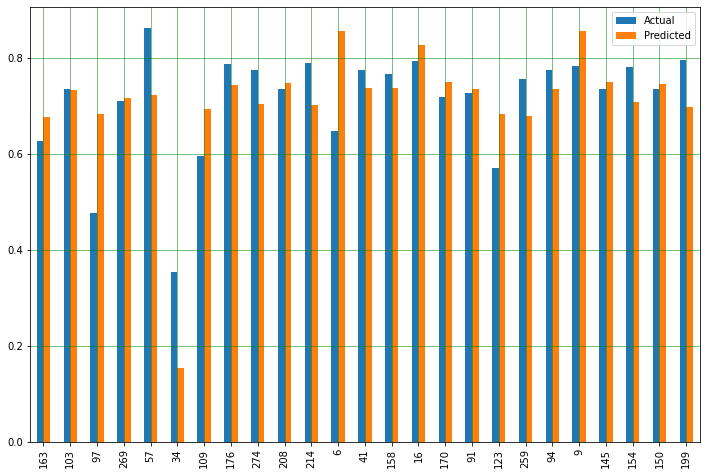

In [85]:
#plotting the actual vs predicted
df_plot = df.head(25)
df_plot.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

As the requirement in the problem statement to run the linear regression, We can see that the linear regression model has returned good results on the test dataset. However here I have made an assumption that the data has a linear relationship. We need to have a good amount of data to get an overall good prediction. The features used here have a high correlation with the target feature as seen from the p-value or correlation score barplot. However there was shortcoming when tested for RFE. I further checked for the accuracy of the prediction using Random Forest.

In [86]:
from sklearn.ensemble import RandomForestRegressor
reg =RandomForestRegressor(n_estimators =10, random_state =18)
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=18, verbose=0, warm_start=False)

In [87]:
y_rf = reg.predict(X_test)

In [88]:
#comparing the actual output values with the predicted ones
df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf})
df_rf

,Actual,Predicted
163,0.625628,0.622106
103,0.735538,0.750421
97,0.475955,0.567209
269,0.710034,0.778105
57,0.862671,0.824022
...,...,...
18,0.654983,0.734189
87,0.573058,0.697155
271,0.750803,0.682479
135,0.784131,0.787261


In [89]:
# Calculating the absolute errors
errors = abs(y_rf - y_test)

In [90]:
# Calculating the mean absolute percentage error 
mae = 100 * (errors / y_test)
# displaying the  accuracy
accuracy = 100 - np.mean(mae)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.02 %.


Random forest has worked well, with an accuracy of around 92%. Since we have taken all the features for the RandomForest model and are getting the good accuracy, we can conclude that the features are important for predicting the cannabinoids output. For the confusion in RFE, i think we should consider a large datatset. However we could also check for cross validation and hypertune the model for better accuracy.

Overall I hope i did some meaningful work to get the important features and build the model for predicting the cannabinoids output. It was a good learning experience and I got to learn new things in the process of doing this assignment.